In [7]:
import urllib.request 
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('omw-1.4')
import re
import inflect
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [8]:
def open_url(url):
    file = urllib.request.urlopen(url)
    decoded_line = ''
    for line in file:
	    decoded_line += line.decode("utf-8")
    return decoded_line
def discard(text):
    # removing starting and ending portion that is unwanted
    start = text.find('*** START OF THE PROJECT')
    end = text.find('*** END OF THE PROJECT')
    text = text[start:end]
    # removing links from text
    re.sub(r'http\S+', '', text)
    return text
def lower_case(text: str):
    return text.lower()
def lemmanization(text):
    arr = text.split()
    array = []
    lemmatizer = WordNetLemmatizer()
    for i in arr:
        array.append(lemmatizer.lemmatize(i))
    return ' '.join(array)
def remove_tags(text):
    TAG_RE = re.compile(r'<[^>]+>')
    return TAG_RE.sub('', text)
def remove_punctuations(text):
    punc = '''!()-[]{};:'"\,<>./?’@”#$%^“&*_~'''
    for ele in text:
        if ele in punc:
            text = text.replace(ele, "")
    return text
def tokenization(text):
    return nltk.word_tokenize(text)
def stemming(text):
    tokens=tokenization(text)
    arr = []
    ps = PorterStemmer()
    for i in tokens:
        arr.append(ps.stem(i))
    return ' '.join(arr)
def remove_stop_words(text):
    # return [word for word in tokens if word not in STOPWORDS]
    tokens=tokenization(text)
    arr = []
    stop_words = set(stopwords.words('english'))
    for i in tokens:
        if i not in stop_words:
            arr.append(i)
    return ' '.join(arr)
def frequency_distribution(text):
    tokens = word_tokenize(text) 
    pd.Series(tokens).value_counts()[:20].plot(kind='bar')
def word_cloud_plot(text):
    tokens = tokenization(text)
    wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color="black").generate(text)
    # plt the image generated by WordCloud class
    plt.figure(figsize=(12,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
def word_length_frequency(text):
    token = tokenization(text)
    dic = list(set(token))
    length = [len(i) for i in token]
    pd.Series(length).value_counts()[:20].plot(kind='bar')
def frequency_distribution_of_tags(tags):
    tags = [i[1] for i in tags]
    count = Counter(tags)
    x = [i for i in count]
    y = [count[i] for i in count]
    plt.plot(x, y)
    plt.show()
def pos_tagging(text):
    tokens = tokenization(text)
    tag = nltk.pos_tag(tokens)
    return tag


In [17]:
 text1 = open(r"/content/drive/MyDrive/NLP/nlpbook .txt",encoding='utf-8').read()

def preprocessing(text):
    text=discard(text)
    text=lower_case(text)
    text=remove_tags(text)
    text=lemmanization(text)
    text=remove_punctuations(text)
    text=stemming(text)
    return text
# print(text1)
text1 = preprocessing(text1)
text1 = remove_stop_words(text1)
# print(text1)


In [18]:
def give_noun(tag):
    is_noun = lambda pos: pos[:1] == 'N'
    return [word for (word, pos) in tag if is_noun(pos)]
    
def give_verb(tag):
    is_verb = lambda pos: pos[:1] == 'V'
    return [word for (word, pos) in tag if is_verb(pos)]

tag1 = pos_tagging(text1)

noun_book_1 = give_noun(tag1)
verb_book_1 = give_verb(tag1)

print(len(noun_book_1), noun_book_1)
print(len(verb_book_1), verb_book_1)


In [19]:
from nltk.corpus import wordnet as wn
def categories_word(words):
    categories = []
    for i in words:
        categorie = []
        for syn in wn.synsets(i):
            if ('noun' in syn.lexname()) & ('Tops' not in syn.lexname()):
                categorie.append(syn.lexname())
            if 'verb' in syn.lexname():
                categorie.append(syn.lexname())
        categories.append(categorie)
    return categories

noun_cat_1 = categories_word(noun_book_1)
verb_cat_1 = categories_word(verb_book_1)
print(verb_cat_1)

In [21]:
def synset(noun, verb):
    nouns = []
    verbs = []
    for word in noun:
        for syn in wn.synsets(word):
            if ('noun' in syn.lexname()) & ('Tops' not in syn.lexname()):
                nouns.append(syn.lexname())
            if 'verb' in syn.lexname():
                verbs.append(syn.lexname())
    for word in verb:
        for syn in wn.synsets(word):
            if ('noun' in syn.lexname()) & ('Tops' not in syn.lexname()):
                nouns.append(syn.lexname())
            if 'verb' in syn.lexname():
                verbs.append(syn.lexname())

    return nouns, verbs

noun_superset1, verb_superset1 = synset(noun_book_1, verb_book_1)
print(verb_superset1)

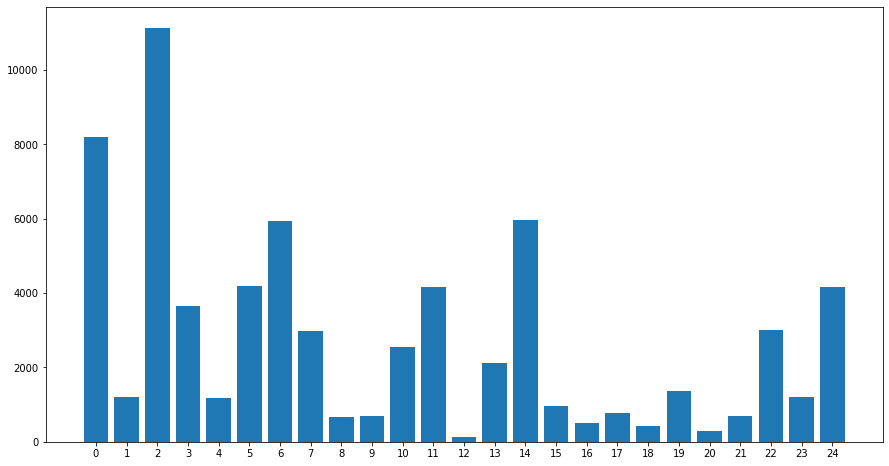

In [22]:
import matplotlib.pyplot as plt
import numpy as np
labels, counts = np.unique(noun_superset1, return_counts=True)
ticks = range(len(counts))
plt.figure(figsize=(15, 8))
plt.bar(ticks, counts, align='center')
plt.xticks(ticks, range(len(counts)))
ticks = range(len(counts))

In [23]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
doc1 = nlp(text1)
print([[x, x.ent_iob_] for x in doc1])

In [24]:
def entity_recognition(text):
  doc=nlp(text)
  person=[]
  org=[]
  location=[]
  for X in doc:  
    if (X.ent_type_=='PERSON') and X.text not in person:
      person.append(X.text)
    if (X.ent_type_=='ORG')and X.text not in org:
      org.append(X.text)
    if ((X.ent_type_=='LOC') or (X.ent_type_=='GPE')) and X.text not in location:
      location.append(X.text)
  return person,org,location
def freq(str_list): 
    unique_words = set(str_list)
    counts = {}
    for words in unique_words : 
        counts[words] = str_list.count(words)
    return counts
person1,org1,location1=entity_recognition(text1)
print(person1)
print(org1)
print(location1)    

In [16]:
import spacy
from spacy import displacy
from spacy import tokenizer
from spacy.scorer import Scorer
from spacy.tokens import Doc
from spacy.training import Example

#evaluation function of the given examples
def evaluate(examples):
    scorer = Scorer()
    example = []
    nlp = spacy.load('en_core_web_sm')  # for spaCy's pretrained use 'en_core_web_sm'
    for input_, annot in examples:
        pred = nlp.make_doc(input_)
        temp = Example.from_dict(pred, annot)
        example.append(temp)
    scores = nlp.evaluate(example)
    return scores

#here we input the manually labelled data for evaluation against spaCy english NER model
examples = [('In the early 1970s, packet-switched networks began to proliferate, with the', {'entities': [(3, 18, 'DATE')]}),('ARPAnet—the precursor of the Internet—being just one of many networks. Each of',{'entities': [(0, 7, 'ORG')]}), ('these networks had its own protocol. Two researchers, Vinton Cerf and Robert Kahn,', {'entities': [(37, 40, 'CARDINAL'), (54, 65, 'PERSON'), (70, 81, 'PERSON')]}), ('network protocol called TCP/IP, which stands for Transmission Control', {'entities': [(24, 30, 'PRODUCT'), (49, 69, 'PRODUCT')]}), ('Protocol/Internet Protocol. Although Cerf and Kahn began by seeing the protocol as', {'entities': [(0, 26, 'LAW'), (46, 50, 'PERSON')]}), ('a single entity, it was later split into its two parts, TCP and IP, which operated sepa-', {'entities': [(45, 48, 'CARDINAL'), (56, 59, 'ORG'), (64, 66, 'ORG')]}), ('rately. Cerf and Kahn published a paper on TCP/IP in May 1974 in IEEE', {'entities': [(17, 21, 'PERSON'), (43, 49, 'ORG'), (53, 61, 'DATE'), (65, 69, 'ORG')]}), ('Transactions on Communications Technology [Cerf 1974].', {'entities': [(0, 41, 'ORG'), (48, 52, 'DATE')]}), ('     The TCP/IP protocol, which is the bread and butter of today’s Internet, was devised', {'entities': [(13, 15, 'ORG'), (59, 64, 'DATE')]}), ('before PCs, workstations, smartphones, and tablets, before the proliferation of Ethernet,', {'entities': [(80, 88, 'PRODUCT')]}), ('cable, and DSL, WiFi, and other access network technologies, and before the Web,', {'entities': [(11, 14, 'PRODUCT'), (16, 20, 'PRODUCT')]}), ('social media, and streaming video. Cerf and Kahn saw the need for a networking pro-', {'entities': [(44, 48, 'PERSON')]}), ('     In 2004, Cerf and Kahn received the ACM’s Turing Award, considered the', {'entities': [(8, 12, 'DATE'),(14, 18, 'PERSON'), (23, 27, 'PERSON'), (41, 44, 'ORG'), (46, 58, 'ORG')]}), ('“Nobel Prize of Computing” for “pioneering work on internetworking, including the', {'entities': [(1, 25, 'WORK_OF_ART')]}), ('design and implementation of the Internet’s basic communications protocols, TCP/IP,', {'entities': [(76, 82, 'ORG')]})]

#loading the model
nlp = spacy.load('en_core_web_sm')
t1 = open("/content/drive/MyDrive/NLP/passage1.txt", encoding="utf8").read() #read data from file
text=""
ex = []
for line in t1:
    text = line
    doc = nlp(text)
    # ents = [(e.text, e.start_char, e.end_char, e.label_) for e in doc.ents]
    temp = (line[:len(line)-1], {'entities':[(e.start_char, e.end_char, e.label_) for e in doc.ents]}) #extracting entites from the line
    if len(doc.ents)>0:
        ex.append(temp)

results = evaluate(examples)    #evaluating the model
print(ex)
print("Precision {:0.4f}\tRecall {:0.4f}\tF-score {:0.4f}".format(results['ents_p'], results['ents_r'], results['ents_f']))

[('', {'entities': [(0, 1, 'ORG')]}), ('', {'entities': [(0, 1, 'ORG')]}), ('', {'entities': [(0, 1, 'ORG')]}), ('', {'entities': [(0, 1, 'ORG')]}), ('', {'entities': [(0, 1, 'ORG')]}), ('', {'entities': [(0, 1, 'ORG')]}), ('', {'entities': [(0, 1, 'ORG')]}), ('', {'entities': [(0, 1, 'ORG')]}), ('', {'entities': [(0, 1, 'ORG')]}), ('', {'entities': [(0, 1, 'ORG')]}), ('', {'entities': [(0, 1, 'ORG')]}), ('', {'entities': [(0, 1, 'ORG')]}), ('', {'entities': [(0, 1, 'ORG')]}), ('', {'entities': [(0, 1, 'ORG')]}), ('', {'entities': [(0, 1, 'ORG')]}), ('', {'entities': [(0, 1, 'ORG')]})]
Precision 0.8214	Recall 0.7667	F-score 0.7931


/usr/local/lib/python3.8/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "     In 2004, Cerf and Kahn received the ACM’s Tur..." with entities "[(8, 12, 'DATE'), (14, 18, 'PERSON'), (23, 27, 'PE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


In [1]:
(from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
